In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Datasets/naukri_data.csv")

In [5]:
# Descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_exp,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
avg_pay,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06


In [9]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

In [11]:
print(categorical)

['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [13]:
numerical=[col for col in df.columns if df[col].dtype != 'object']

In [15]:
print(numerical)

['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp', 'avg_pay']


In [17]:
df.corr()

,jobid,numberofpositions,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay
jobid,1.000000,-0.041356,-0.010856,-0.009570,0.025795,0.023397,0.024937,-0.008172
numberofpositions,-0.041356,1.000000,-0.121553,-0.148161,-0.194685,-0.212955,-0.208745,-0.138778
min_pay,-0.010856,-0.121553,1.000000,0.938850,0.709683,0.677629,0.704354,0.979315
max_pay,-0.009570,-0.148161,0.938850,1.000000,0.612399,0.624441,0.630134,0.989101
min_exp,0.025795,-0.194685,0.709683,0.612399,1.000000,0.922456,0.975517,0.716731
max_exp,0.023397,-0.212955,0.677629,0.624441,0.922456,1.000000,0.984785,0.701668
avg_exp,0.024937,-0.208745,0.704354,0.630134,0.975517,0.984785,1.000000,0.721296
avg_pay,-0.008172,-0.138778,0.979315,0.989101,0.716731,0.701668,0.721296,1.000000


Text(0.5, 1.0, 'Heatmap of Job market analysis')

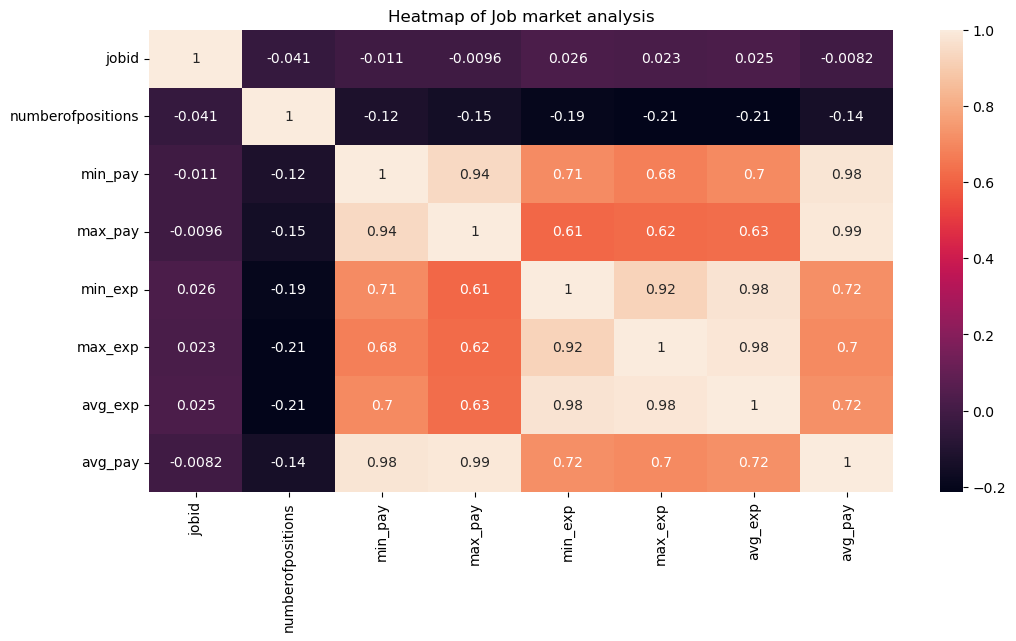

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot= True)
plt.title("Heatmap of Job market analysis")

In [21]:
df.corr()['min_pay']

jobid               -0.010856
numberofpositions   -0.121553
min_pay              1.000000
max_pay              0.938850
min_exp              0.709683
max_exp              0.677629
avg_exp              0.704354
avg_pay              0.979315
Name: min_pay, dtype: float64

Now Company based analysis
and
Let's automate it

In [24]:
data = df.copy()

In [26]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay'],
      dtype='object')

In [28]:
def perform_analysis(data, feature,col1,col2,chart=1):
    dataframe =data[feature].value_counts().reset_index()
    dataframe.columns=[col1,col2]
    
    print(dataframe.head(5))
    if chart ==1:
        plt.bar(dataframe[col1][0:10],dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        
    elif chart==2:
        plt.pie(labels =dataframe[col1][0:10],x=dataframe[col2][0:10])

In [30]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay'],
      dtype='object')

                                        company  Number of jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


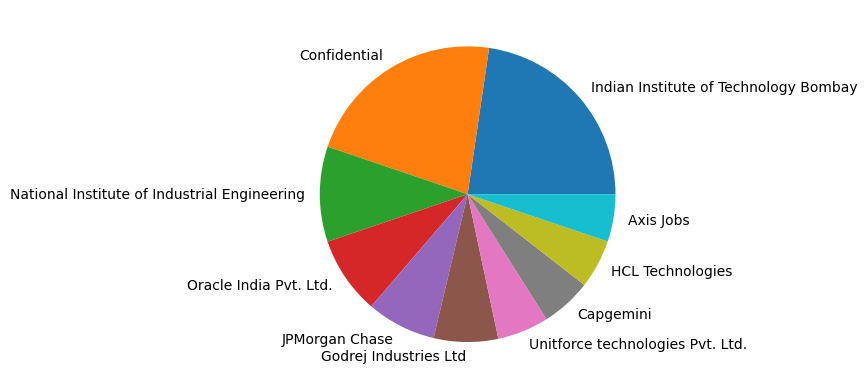

In [32]:
perform_analysis(data,'company','company','Number of jobs',2)

Industry analysis , job-title analysis, skills analysis, job-location analysis

                               industries  Number of jobs
0         IT-Software / Software Services            9216
1         Education / Teaching / Training            1322
2                BPO / Call Centre / ITES            1254
3  Banking / Financial Services / Broking            1238
4                  Recruitment / Staffing            1129


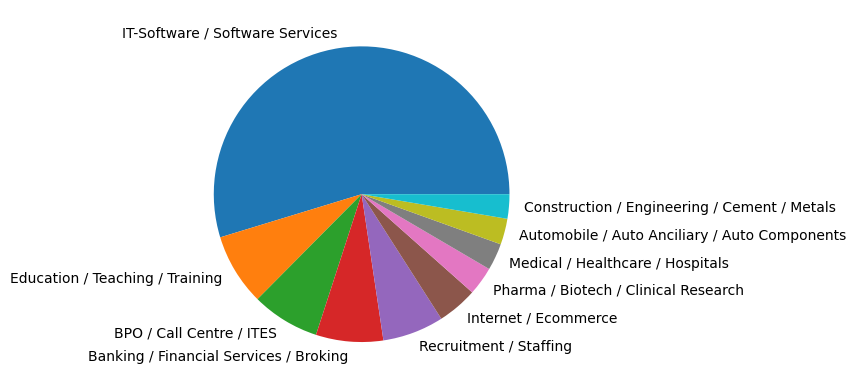

In [35]:
perform_analysis(data,'industry','industries','Number of jobs',2) # The IT sector has the more nber of jobs in India

                       Job_titles  Number of jobs
0  Business Development Executive              93
1    Business Development Manager              92
2               Software Engineer              81
3                 Project Manager              67
4               Android Developer              65


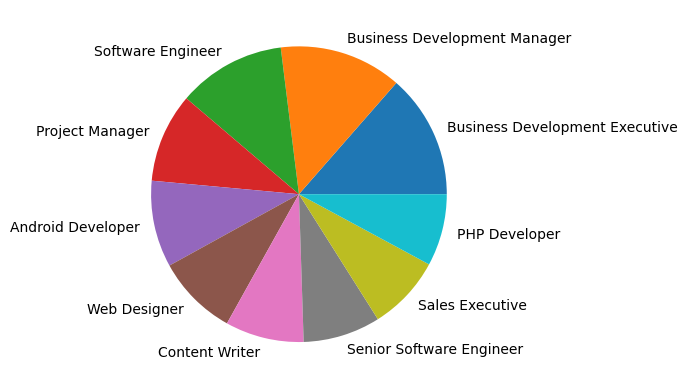

In [37]:
perform_analysis(data,'jobtitle','Job_titles','Number of jobs',2) # top 5 job titles where we have more job in India

                                  Skills  count
0  IT Software - Application Programming   5989
1                                  Sales   2893
2                                   ITES   1640
3                               Teaching   1091
4                                     HR    928


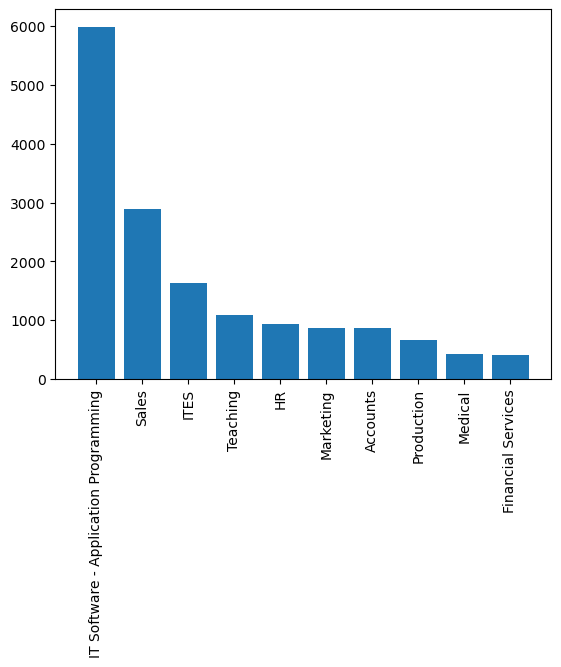

In [39]:
perform_analysis(data,'skills','Skills','count') # IT, Sales, ITES ,Teaching are th most growing sectors in India

      Cities  Number of jobs
0  Bangalore            5228
1     Mumbai            2887
2      Delhi            2741
3  Hyderabad            2182
4    Chennai            1204


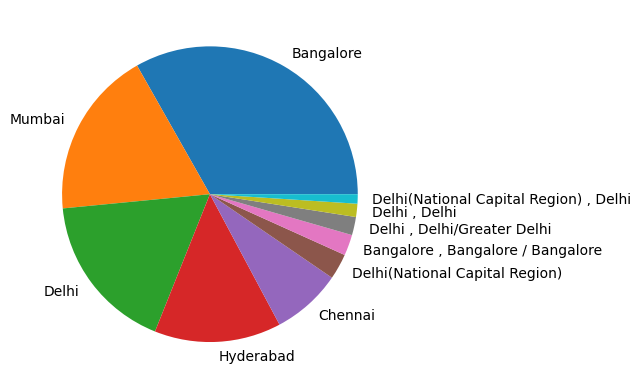

In [41]:
perform_analysis(data,'joblocation_address','Cities','Number of jobs',2) # The top five cities producing the most jobs India 